# Direct Pattern Evolution

In [181]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
import numpy as np
import matplotlib.pyplot as plt
from direct import GA, Individual, IndividualRandomCross,IndividualTwoPointCross, IndividualNoWrap
import patterns
from plot import plot

In [193]:
# GA params
num_gens = 100
pop_size = 100
elitism = 1

# GA metaparams
num_repeats = 5
dimensions = [16, 32, 64]

targets = [[patterns.random(d, d), patterns.checkerboard(d, d, 4)] for d in dimensions]

In [ ]:
def run(Individual):
    fitnesses = np.zeros((len(dimensions), 2, num_repeats))
    outputs = np.zeros((len(dimensions), 2, num_repeats), dtype=object)
    
    for di in range(len(dimensions)):
        mutation_rate = 1.0 / (dimensions[di]**2) # Average 1 mutation.

        for ti, target in enumerate(targets[di]):

            for ri in range(num_repeats):
                
                top = GA(pop_size, num_gens, elitism, target, Individual, mutation_rate)
                fitnesses[di, ti, ri] = top[-1].fitness
                outputs[di, ti, ri] = top[-1].genome
            
    return fitnesses, outputs

# A 2D matrix genome with sub-section crossover

![crossover](crossover.jpg)

An individual contains a 2D genome that maps directly the phenotype. Crossover involves picking positions a and b in the matrix that define a subsection which is swiched from one to the other.

In [195]:
F, O = run(Individual)

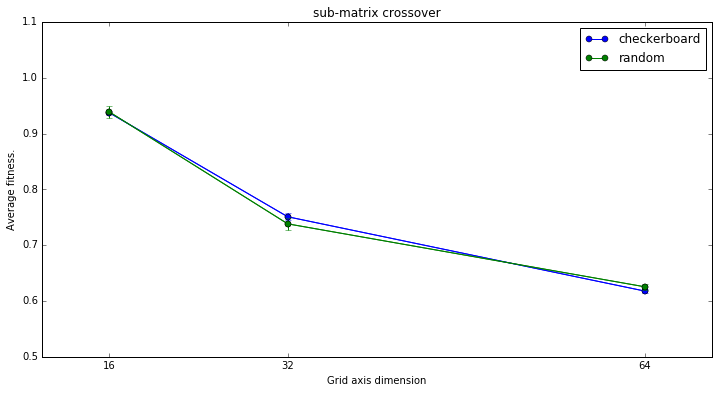

In [197]:
plot(F, dimensions, 'sub-matrix crossover')

In [222]:
# Print best 16x16 targets
pretty_print(O[0][1][np.argmax(F[0][1])])

 # # # _ _ _ _ _ # # # # _ _ _ _
 # # # # _ _ _ _ _ # # # _ _ _ _
 # # # # _ _ _ # # # # # # _ _ _
 # # # # _ _ _ _ # # # # _ _ _ _
 _ _ _ _ # # # # _ _ _ _ # # # #
 # _ _ _ # # _ # _ _ _ _ # _ # #
 _ _ _ _ # # # # _ _ _ _ # # # #
 _ _ _ _ # # # # _ _ _ _ # # # #
 # # # # _ _ _ _ # # # # _ _ _ _
 # # # # _ _ _ _ # # # # _ _ # _
 # # # # _ _ _ _ # _ # # _ _ _ _
 # # # # _ _ _ _ # # # # _ _ _ _
 _ _ _ _ # # # # _ _ _ _ # # # #
 _ _ _ _ _ # # # _ _ _ _ # # # #
 _ _ _ _ # # # # _ _ _ _ # # _ _
 _ _ _ _ # # # # _ _ _ _ # # # #



# A 2D Genome with sub-section crossover (no wrapping)

Let's validate wrapping subsections.

In [220]:
f_nw, o_nw = run(IndividualNoWrap)

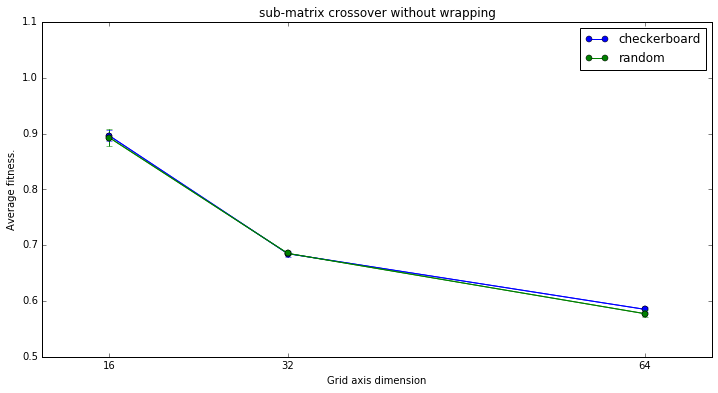

In [221]:
plot(f_nw, dimensions, 'sub-matrix crossover without wrapping')

In [223]:
pretty_print(o_nw[0][1][np.argmax(f_nw[0][1])])

 # # # # _ _ _ _ # # # # _ _ _ _
 # # # _ _ # _ _ # # # _ _ _ _ _
 # # _ # _ _ _ # # # # # _ _ _ _
 # # # # _ _ _ _ # # # # _ # _ _
 _ _ # # # # _ _ # _ _ _ # # # _
 _ _ _ _ # # # # _ _ _ _ # # # #
 _ _ _ _ # # # # _ _ _ _ # # # #
 _ _ _ _ # # # # _ _ _ _ # # # #
 # # _ # _ _ _ _ # # # # _ _ _ #
 # # # # _ _ _ _ # # # # _ _ _ _
 # # # # _ _ _ _ # # # # _ _ _ _
 # _ # # _ _ _ _ # # # # _ _ _ _
 _ _ _ _ # # # # _ _ _ _ # # _ #
 _ _ _ _ # _ # # # _ _ _ # # # #
 _ _ _ _ # # # # _ _ _ _ # # _ #
 # _ _ _ # # # # _ _ _ _ # # # #



# A 2D matrix genome with different sub-section crossover

In [198]:
f_rand, o_rand = run(IndividualRandomCross)

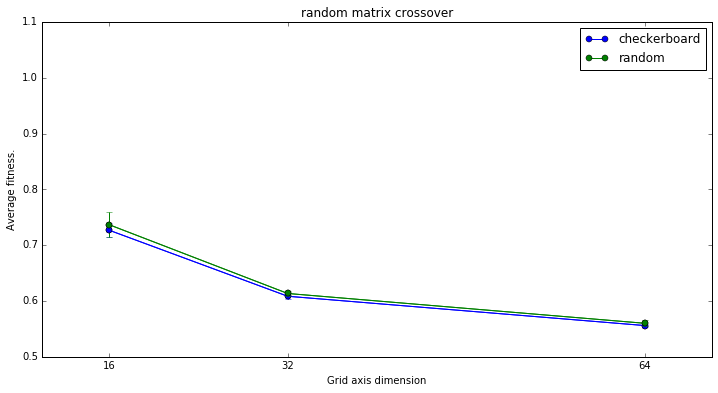

In [199]:
plot(f_rand, dimensions, 'random matrix crossover')

In [213]:
pretty_print(o_rand[0][1][np.argmax(f_rand[0][1])])

 # _ _ _ # _ _ _ _ # # _ # _ _ _
 # # # _ _ _ _ _ # _ _ _ _ _ _ _
 # # # # # _ # # # # # _ _ _ # #
 # _ # _ # _ _ _ # # # # # _ _ _
 _ _ # _ # # # # _ _ _ _ _ # # #
 _ # _ _ # # # # # _ _ _ # # # #
 _ _ _ # # _ # _ _ _ _ _ # _ _ #
 _ _ _ _ # # # _ # _ _ _ # _ # _
 # # _ # _ _ _ # # _ _ # _ _ _ _
 # # # # # _ _ _ # # # # _ # _ _
 # # _ _ _ # # _ # # _ _ _ _ _ #
 # # # # _ # _ _ _ # _ _ _ _ _ _
 # _ _ _ _ # # # _ _ _ _ # # # #
 _ # # _ # # _ # _ _ _ _ # # _ _
 _ _ _ _ # # # # _ # _ _ # # # #
 _ _ _ _ # # _ # _ _ _ _ # # # #



# A 1D matrix genome with two point crossover

In [215]:
f_2p, o_2p = run(IndividualTwoPointCross)

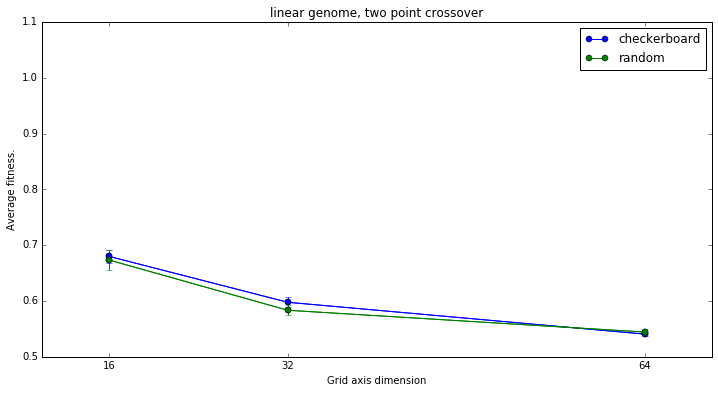

In [203]:
plot(f_2p, dimensions, 'linear genome, two point crossover')

In [226]:
pretty_print(o_2p[0][1][np.argmax(f_2p[0][1])])

 _ _ # _ _ _ _ _ # _ # _ _ # # _
 _ _ # # # _ # # _ _ _ _ _ _ # _
 # _ # # _ _ _ _ _ # _ # _ # _ _
 _ # # _ _ _ # _ _ _ # # _ _ # #
 _ _ # _ # # # _ _ _ # # # # # #
 # _ _ _ _ # # # # _ _ # _ # _ #
 # _ _ # _ # # _ # _ # _ # # # #
 _ # # # # # # # _ # _ _ # _ # _
 _ # # # _ _ # # # _ _ _ # _ _ _
 # # # # _ _ # _ # # # _ # # _ #
 _ # # _ # _ _ _ _ # _ _ _ _ _ #
 # # # # _ # _ # _ # # # _ # _ _
 _ _ # # _ # _ _ _ _ _ # # # _ #
 # # _ _ # _ # _ _ _ _ # # _ # _
 # _ _ # # # # _ # # _ _ _ # # #
 # _ _ _ # # # # # _ # # _ # _ #

